In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 100)

from utils.utils import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
%%time
hemato = make_all_dataset(force_download='no')

# só apagar linhas abaixo após proximo force 'soft'
hemato['ETNIA'] = hemato.ETNIA.fillna('0000')
hemato.VAL_SH_FED.fillna(0, inplace=True)
hemato.VAL_SP_FED.fillna(0, inplace=True)
hemato.VAL_SH_GES.fillna(0, inplace=True)
hemato.VAL_SP_GES.fillna(0, inplace=True)
hemato.drop(['VAL_UCI', 'MARCA_UCI', 'CNPJ_MANT', 'CGC_HOSP', 'DIAG_SECUN',
             'CID_ASSO', 'CID_MORTE'], axis=1, inplace=True)

Optimizing df...

Original df size: Total memory usage: 1530.61 MB
Optimized df size: Total memory usage: 154.20 MB
CPU times: user 26.7 s, sys: 2.65 s, total: 29.3 s
Wall time: 30.7 s


In [3]:
hemato.head()

,UF_ZI,ANO_CMPT,MES_CMPT,N_AIH,MUNIC_RES,NASC,SEXO,UTI_MES_TO,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,VAL_SH,VAL_SP,VAL_SADT,VAL_ACOMP,VAL_SANGUE,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,GESTAO,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,CAR_INT,INSTRU,INSC_PN,CBOR,VINCPREV,CNES,COMPLEX,FINANC,RACA_COR,ETNIA,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,UF,DIAG_PRINC_CAT
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24,120000,2017,01,1216100534044,120042,20160420,1,0,0,3,4,193.550003,36.139999,0.0,0.0,0.0,229.690002,0.000000,74.330002,2016-12-21,2016-12-25,D693,2,120020,3,8,4,0,010,02,0,000000000000,000000,0,5336171,02,06,03,0000,0.0,0.0,0.0,0.0,AC,D69
157,120000,2017,01,1217100010049,120020,20150221,3,0,0,3,3,61.779999,8.150000,0.0,0.0,0.0,69.930000,0.000000,22.629999,2017-01-03,2017-01-06,C837,2,120040,4,1,3,0,010,01,0,000000000000,000000,0,2000385,02,06,03,0000,0.0,0.0,0.0,0.0,AC,C83
159,120000,2017,01,1217100010104,120040,20141006,1,5,0,22,22,2268.379883,347.149994,0.0,0.0,0.0,2615.530029,2393.600098,846.440002,2017-01-04,2017-01-31,C920,2,120040,4,2,27,0,010,01,0,000000000000,000000,0,2000385,02,06,03,0000,0.0,0.0,0.0,0.0,AC,C92
214,120000,2017,01,1217100011028,120040,20110930,3,0,0,4,4,201.550003,36.139999,0.0,0.0,0.0,237.690002,0.000000,76.919998,2016-12-30,2017-01-03,D692,2,120040,4,5,4,0,010,01,0,000000000000,000000,0,2000385,02,06,03,0000,0.0,0.0,0.0,0.0,AC,D69
245,120000,2017,01,1217100034612,120020,19841120,3,0,0,8,8,233.550003,36.139999,0.0,0.0,0.0,269.690002,0.000000,87.269997,2017-01-12,2017-01-20,D689,2,120020,4,32,8,0,010,02,0,000000000000,000000,0,5336171,02,06,03,0000,0.0,0.0,0.0,0.0,AC,D68


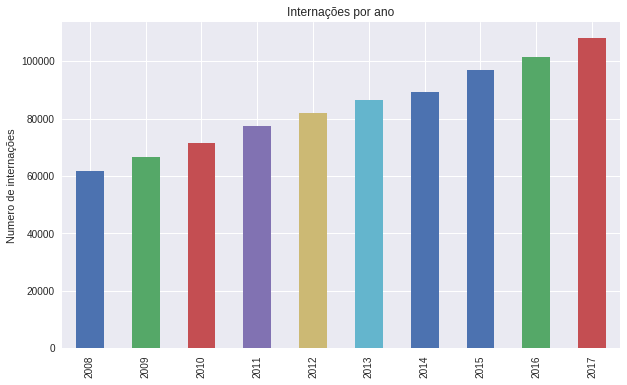

In [4]:
# internações por ano:

hemato.ANO_CMPT.value_counts().sort_index().plot(kind='bar', title='Internações por ano', figsize=(10, 6))
plt.ylabel('Numero de internações')
plt.show()

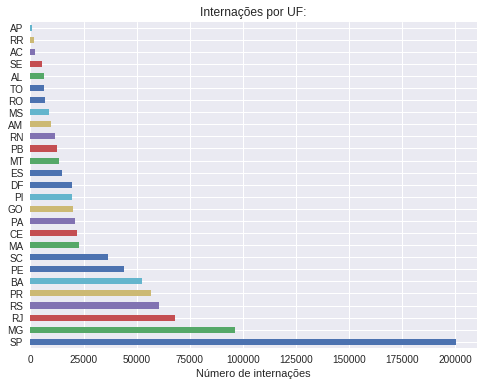

In [5]:
hemato.UF.value_counts().plot(kind='barh', figsize=(8, 6))
plt.title('Internações por UF:')
plt.xlabel('Número de internações')
plt.show()

In [6]:
import wget
import os
from utils import PRODUCED_DATASETS
from zipfile import ZipFile


def download_zip(url, force_download=False):
    '''
    Download TAB_SIH.zip and save in cache.
    
    Returns
    -------
        local path to the downloaded file
    '''
    filename = wget.detect_filename(url)
    local_file = os.path.join(PRODUCED_DATASETS, filename)
    if not os.path.exists(local_file) or force_download:
        wget.download(url, localfile)
    return local_file
        
from dbfread import DBF
import re

def make_maps(force_download=False):
    
    CID_URL = 'http://www.datasus.gov.br/cid10/V2008/downloads/CID10CSV.zip'
    local_zipfile = download_zip(CID_URL, force_download)
    with ZipFile(local_zipfile) as zfile:
        l = zfile.namelist()
#         print(l)
        
        with zfile.open('CID-10-SUBCATEGORIAS.CSV') as cid_file:
            cid_map = pd.read_csv(cid_file, sep=';', encoding='iso-8859-1', usecols=['SUBCAT', 'DESCRICAO'],
                                 index_col='SUBCAT', squeeze=True)

    
    TAB_SIH_URL = 'ftp://ftp.datasus.gov.br/dissemin/publicos/SIHSUS/200801_/Auxiliar/TAB_SIH.zip'
    local_zipfile = download_zip(TAB_SIH_URL, force_download)
    with ZipFile(local_zipfile) as zfile:
        l = zfile.namelist()
        
        # ETNIA
        with zfile.open('etnia.cnv') as et_file:
            df_et = pd.read_table(et_file, sep=b'\s{2,}', engine='python', encoding='iso-8859-1',
                                   skiprows=1, header=None).applymap(func_decode)
            ni = pd.DataFrame([{1:'NÃO INFORMADO', 2:'0000'}, {1:'NÃO INFORMADO', 2:'9999'}])
            df_et = pd.concat([df_et, ni], ignore_index=True).drop(0, axis=1).drop(0)
            et_map = pd.Series(df_et[1].tolist(), df_et[2].tolist())
    
        # SEX
        with zfile.open('SEXO.CNV') as sex_file:
            df = pd.read_table(sex_file, sep=b'\s{2,}', engine='python',
                               skiprows=1, header=None).applymap(func_decode)
            sex_map = {df.loc[0, 2][0]: df.loc[0, 1],
                       df.loc[0, 2][2]: df.loc[0, 1],
                       df.loc[1, 2]:    df.loc[1, 1],
                       df.loc[2, 2][0]: df.loc[2, 1],
                       df.loc[2, 2][2]: df.loc[2, 1]}

        # UF
        with zfile.open('br_ufsigla.cnv') as uf:
            df = pd.read_table(uf, sep=b'\s{2,}', engine='python',
                               skiprows=1, header=None).applymap(func_decode).dropna(axis=1)
            pe = pd.DataFrame([{1:'PE', 2:'20'}, {1:'PE', 2:'26'}])
            df = pd.concat([df, pe], ignore_index=True)
            df.drop(12, inplace=True)
            uf_map = pd.Series(df[1].tolist(), df[2].tolist())
            
        # CNES
        list_df = []
        list_cnes = [item for item in l if re.search('\S+CNES\S+', item)]
        for file in list_cnes:
            zfile.extract(file)
            dbf = DBF(file, encoding='utf-8')
            cnes_temp = pd.DataFrame(list(dbf))
            list_df.append(cnes_temp)
            os.unlink(file)
        cnes_br = pd.concat(list_df, sort=False).drop_duplicates()
        cnes_br['UF_ZI'] = cnes_br.UF_ZI.map(uf_map)
        cnes_map = pd.Series(cnes_br.NOMEFANT.tolist(), index=cnes_br.CNES.tolist())
    
    
    
    return sex_map, cnes_map, uf_map, cid_map, et_map

def func_decode(x):
    if type(x) == bytes:
        try:
            return x.decode()
        except:
            return x.decode(encoding='iso-8859-1')

In [7]:
sex_map, cnes_map, uf_map, cid_map, et_map = make_maps()

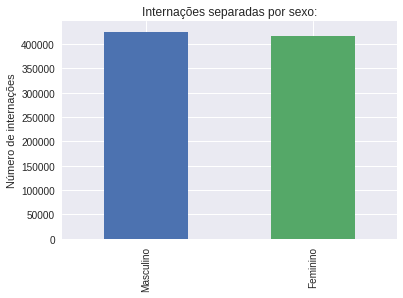

In [8]:
# internações por sexo

hemato.SEXO.map(sex_map).value_counts().plot(kind='bar')
plt.title('Internações separadas por sexo:')
plt.ylabel('Número de internações')
plt.show()

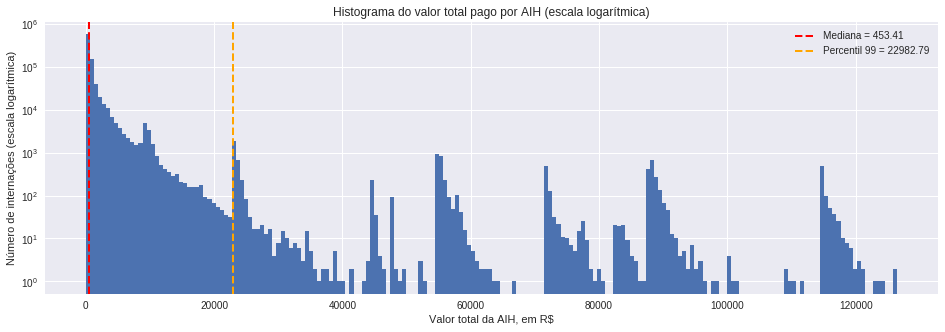

In [9]:
# valor total recebido por AIH
# a escala é logarítmica por causa da amplitude dos valores

hemato.VAL_TOT.hist(log=True, bins=200, figsize=(16, 5))
median = hemato.VAL_TOT.quantile(.5)
p = hemato.VAL_TOT.quantile(.99)
plt.axvline(x=median, color='r', linestyle='--', linewidth=2, label='Mediana = {:.2f}'.format(median))
plt.axvline(x=p, color='orange', linestyle='--', linewidth=2, label='Percentil 99 = {:.2f}'.format(p))

plt.xlabel('Valor total da AIH, em R$')
plt.ylabel('Número de internações (escala logarítmica)')
plt.legend(loc=1)
plt.title('Histograma do valor total pago por AIH (escala logarítmica)')
plt.show()

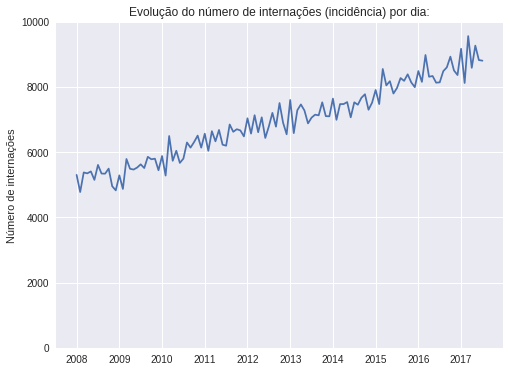

In [10]:
int_by_day = pd.to_datetime(hemato.DT_INTER).value_counts()
# claramente aumentou o número absoluto
# parece que as vezes a velocidade de crescimento diminui um pouco no inverno com picos em fevereiro (?)
# TODO: ver a população a cada ano e ver se aumentou o percentual de internações hemato

int_by_day['2008':'2017'].resample('M').sum()[:-5].plot(figsize=(8, 6),
                                                        ylim=(0, 10000))
plt.title('Evolução do número de internações (incidência) por dia:')
plt.ylabel('Número de internações')
plt.show()

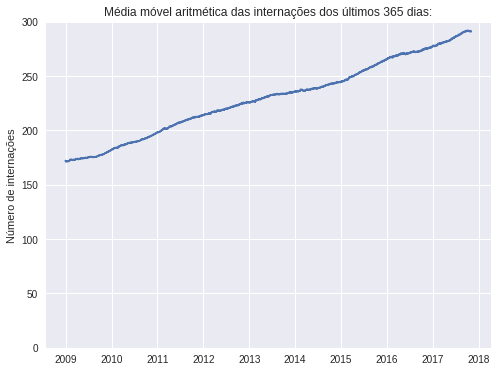

(cada ponto é a média das internações dos últimos 365 dias)


In [11]:
int_by_day['2008':'2017'].resample('D').sum().rolling(365).mean()[:-60].plot(figsize=(8, 6),
                                                                             ylim=(0, 300))
plt.title('Média móvel aritmética das internações dos últimos 365 dias:')
plt.ylabel('Número de internações')
plt.show()
print('(cada ponto é a média das internações dos últimos 365 dias)')

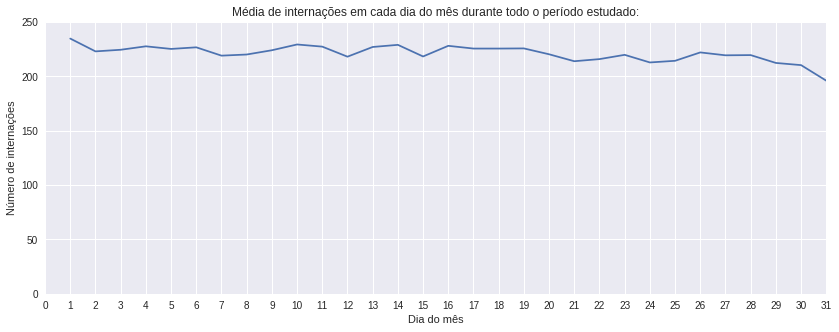

In [12]:
# media de internações por dia do mês

int_by_day.groupby(int_by_day.index.day).mean().plot(figsize=(14, 5), xlim=(0, 31), ylim=(0,250),
                                                     xticks=(np.arange(32))) 
plt.title('Média de internações em cada dia do mês durante todo o período estudado:')
plt.ylabel('Número de internações')
plt.xlabel('Dia do mês')
plt.show()

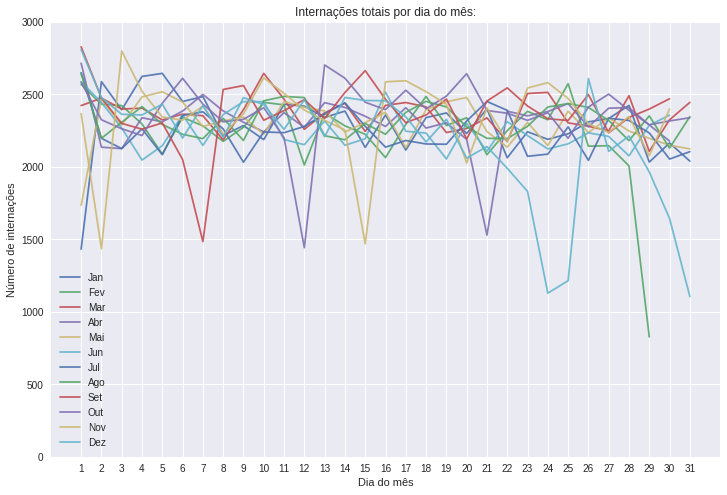

In [13]:
make_daily_int_each_month(hemato)

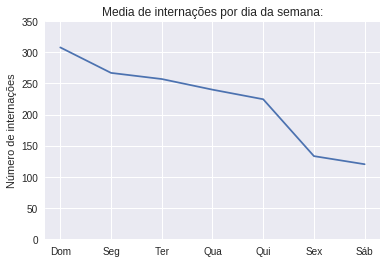

In [14]:
# TODO: fazer bootstrap para ver significância, fazer prevalência

int_by_day.groupby(int_by_day.index.weekday).mean().plot(ylim=(0,350))
plt.xticks(np.arange(7), ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'])
plt.title('Media de internações por dia da semana:')
plt.ylabel('Número de internações')
plt.show()

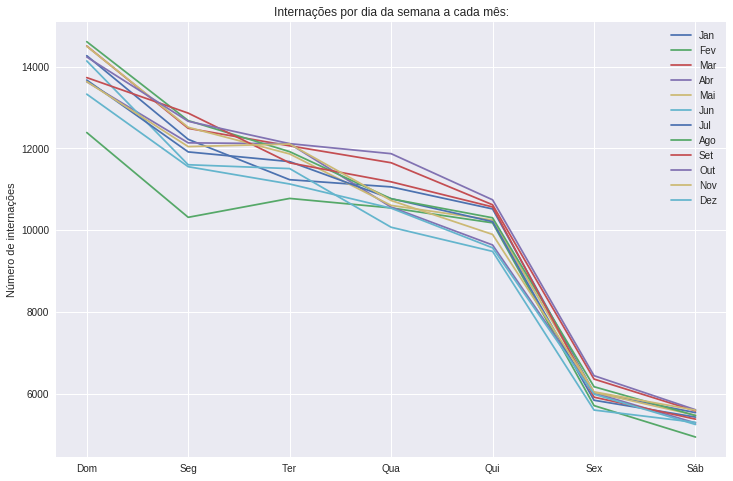

Parece que não muda muito o padrão.


In [15]:
make_weekly_graph(hemato)

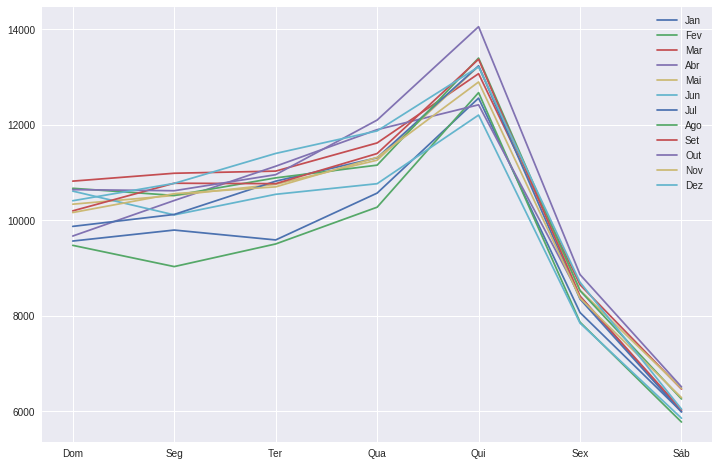

In [16]:
# Altas por dia da semana, em cada mês
# (planejamento de plantões/sobreavisos)
# não é a prevalência, é o número de novas internações (incidência)

pivoted = hemato.pivot_table('N_AIH', index=hemato.DT_SAIDA.dt.weekday, columns=hemato.DT_SAIDA.dt.month,
                             aggfunc='count')

pivoted.columns.name = None
pivoted.columns = months
pivoted.index.name = None

pivoted.plot(figsize=(12, 8), legend=True)
plt.xticks(np.arange(7), ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'])
plt.show()

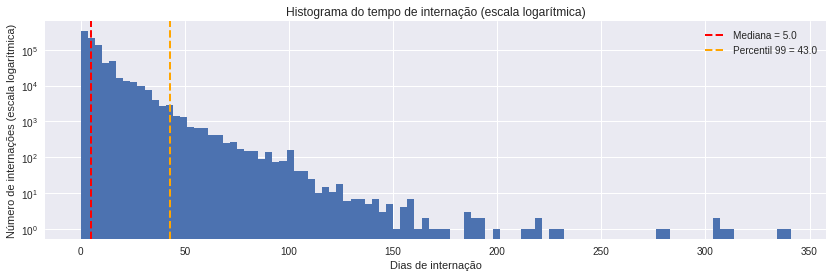

In [17]:
# tempo de internação

hemato.DIAS_PERM.hist(bins=100, log=True, figsize=(14, 4))
median = hemato.DIAS_PERM.quantile(.5)
p = hemato.DIAS_PERM.quantile(.99)
plt.axvline(x=median, color='r', linestyle='--', linewidth=2, label='Mediana = {}'.format(median))
plt.axvline(x=p, color='orange', linestyle='--', linewidth=2, label='Percentil 99 = {}'.format(p))

plt.xlabel('Dias de internação')
plt.ylabel('Número de internações (escala logarítmica)')
plt.legend(loc=1)
plt.title('Histograma do tempo de internação (escala logarítmica)')
plt.show()

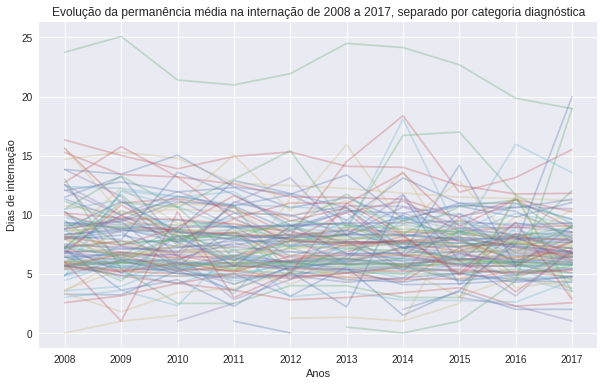

In [18]:
pivoted = hemato.pivot_table('DIAS_PERM', columns='DIAG_PRINC', index='ANO_CMPT', aggfunc='mean')

pivoted.plot(alpha=.3, legend=False, figsize=(10, 6))
plt.xlabel('Anos')
plt.xticks(np.arange(10), pivoted.index)
plt.title('Evolução da permanência média na internação de 2008 a 2017, separado por categoria diagnóstica')
plt.ylabel('Dias de internação')
plt.show()

In [19]:
X = hemato.drop('DIAS_PERM', axis=1)
y = hemato.DIAS_PERM

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_labeled = {}
for col in X.select_dtypes(exclude='number').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    X_labeled[col] = le

In [21]:
X.shape

(841112, 44)

In [ ]:
# o que é mais importante para o tempo de internação?

In [22]:
from sklearn.feature_selection import SelectKBest

In [23]:
kbest = SelectKBest()

In [29]:
fit = kbest.fit(X, y)
selected = fit.transform(X)

/home/gui/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [13 14 15] are constant.
  UserWarning)
/home/gui/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [40]:
cols_kbest = pd.Series(fit.scores_, index=X.columns).sort_values(ascending=False)

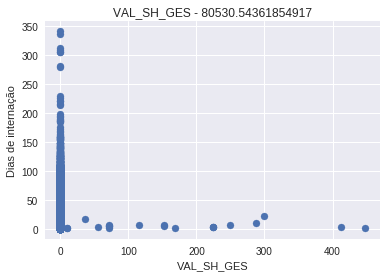

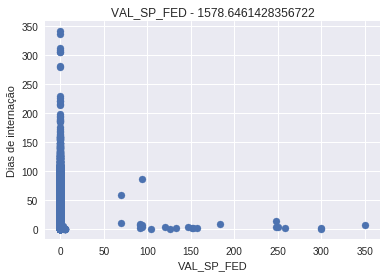

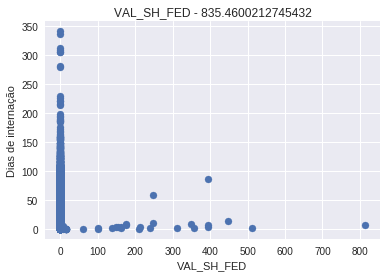

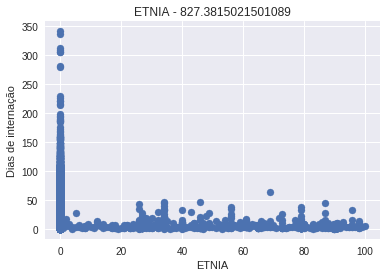

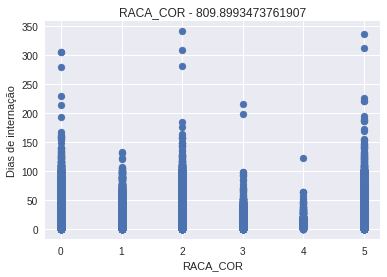

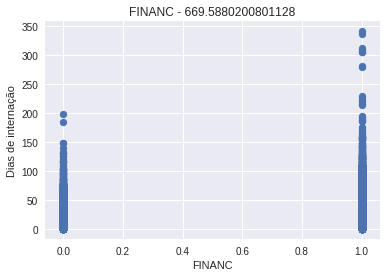

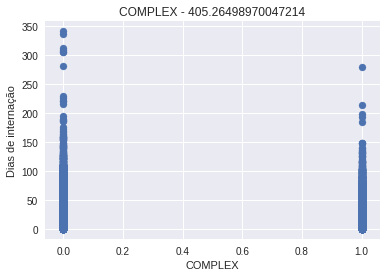

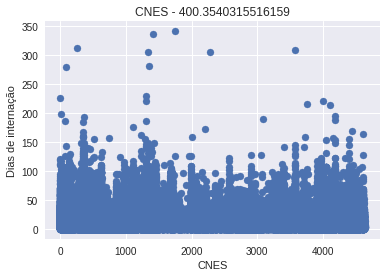

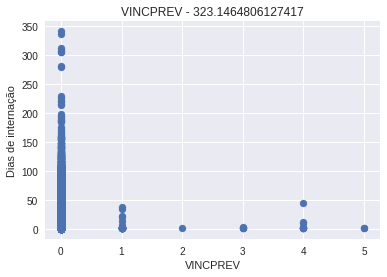

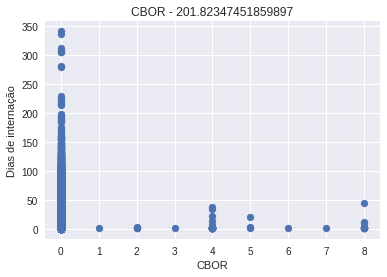

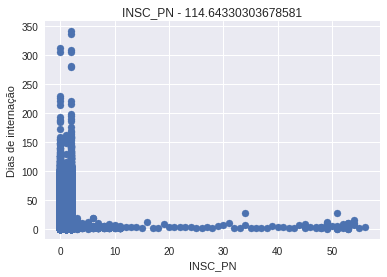

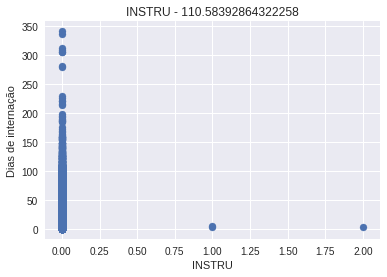

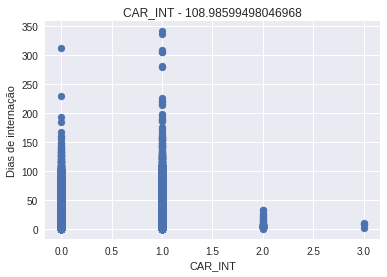

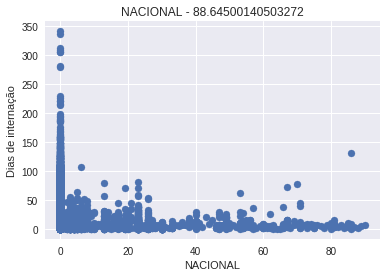

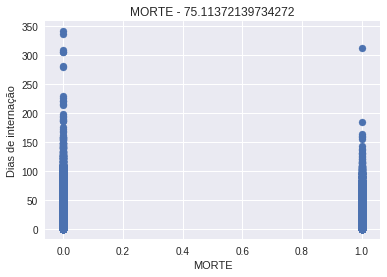

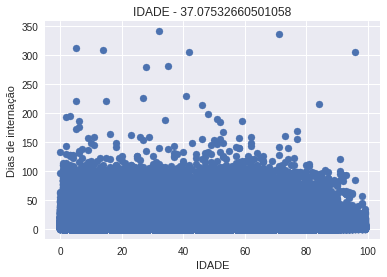

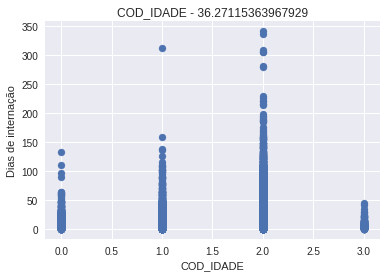

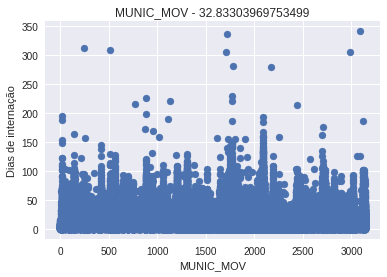

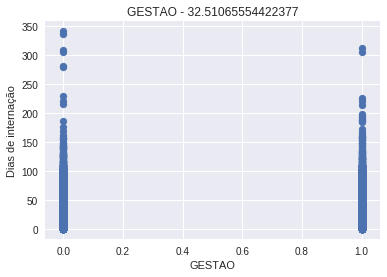

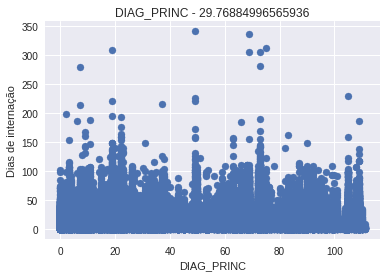

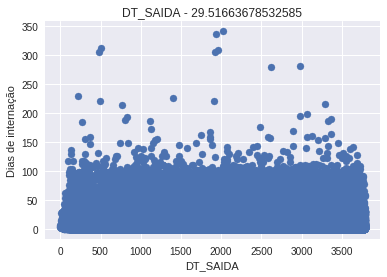

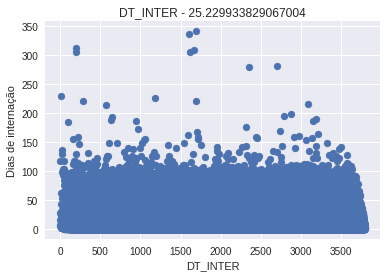

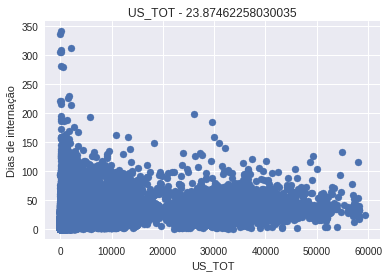

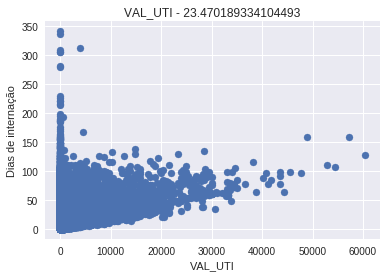

In [ ]:
for col in cols_kbest.index:
    plt.scatter(X[col], y)
    plt.ylabel('Dias de internação')
    plt.xlabel(col)
    plt.title('{} - {}'.format(col, cols_kbest[col]))
    plt.show()

In [ ]:
# TODO: fazer um cluster dos CID, CNES, UF... Cruzar com tempo de internação, custo, morte...

## Todo:

X DIAG_PRINC separar CIDs de hemato antes de juntar os arquivos.

X Por que o N_AIH tem numeros repetidos? Interna várias vezes com o mesmo registro? Erro?

Identificar a cidade pelo CEP e verificar quem tem um endereço e interna em outra cidade/estado.

Posso usar o MUNIC_RES pra fazer o que escrevi acima.

UTI_MES_TO e UTI_INT_TO pode dizer quais CIDs são mais graves. Se o percentual de internações graves aumentou. Posso relacionar se morrem muito na UTI ou se salvam muito.

Hemato ganha muita diaria de acompanhante? DIAR_ACOM

Quais CIDs ficam mais tempo internado? QT_DIARIAS Algum estado demora mais no tratamento, comparando mesmas doenças? Isso se reflete no resultado do tto?

----------
##### Financeiro

VAL_SH (hosp) VAL_SP (profissional) VAL_TOT VAL_UTI US_TOT Quanto paga cada internação de hemato? Qual paga mais?

FINANC A grana vem de onde?

VAL_SADT, VAL_ACOMP, VAL_SANGUE está zerado???

90 VAL_SH_FED numeric (10, 2) Valor do complemento federal de serviços hospitalares. Está
 incluído no valor total da AIH.

91 VAL_SP_FED numeric (10, 2) Valor do complemento federal de serviços profissionais. Está
 incluído no valor total da AIH.

92 VAL_SH_GES numeric (10, 2) Valor do complemento do gestor (estadual ou municipal) de
 serviços hospitalares. Está incluído no valor total da AIH.

93 VAL_SP_GES numeric (10, 2) Valor do complemento do gestor (estadual ou municipal) de
 serviços profissionais. Está incluído no valor total da AIH.
 
VAL_UCI O que é UCI???

-----------

DT_INTER DT_SAIDA DIAS_PERM Datas de int e alta conferem com as diárias? Há datas de anos/meses anteriores que contaram nesta competencia (atraso de envio?)

Não incluí a natureza jurídica e a gestão porque é certo que vai ter mais internações nos tipos de lugares que existem, seja por imposição legal ou incentivo fiscal. Não quer dizer que sejam mais importantes.

MUNIC_MOV Municipio do estabelecimento. Este dado é confiável? Se for, posso usar pra comparar com o MUNIC_RES.

COD_IDADE IDADE Perfil de idade dos pacientes atendidos.

NACIONAL Nacionalidade do paciente

CAR_INT Vem muito pct hemato de emergência?

CBOR NUM_FILHOS INSTRU VINCPREV Acho importante pra comparar por regiões e por tempo, mas tenho dúvidas da veracidade dos dados.

RACA_COR ETNIA Comparar as duas classificações.

Qual a prevalência de pacientes internados? (Como calcular a prevalencia?)